<a href="https://colab.research.google.com/github/alberto2020china/thesis/blob/main/Clustering%26Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Download data and Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
! pip install umap-learn
! pip install hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch
import umap.umap_ as umap
import hdbscan
import torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=d2c9eeaa6487b47e770f0ddd38e68bfa5d59cc981ac959bfb3cbe47be8b17237
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55617 sha256=ded7031a4e2e617ae10fee8eed2e9b03e41576393b7543b6724a7014414d245a
  Stored in dir

In [ ]:
#df_real = pd.read_excel('/content/drive/My Drive/UNED/Tesis/real_clean.xlsx')
#df_fake = pd.read_excel('/content/drive/My Drive/UNED/Tesis/fake_clean.xlsx')
df_agg = pd.read_excel('/content/drive/My Drive/UNED/Tesis/dataset_agg-V3.xlsx')

In [ ]:
#df_real = df_real.dropna(subset=['text'],inplace=False)
#df_fake = df_fake.dropna(subset=['text'],inplace=False)
df_agg = df_agg.dropna(subset=['text'],inplace=False)

In [ ]:
df_agg

,id,news_url,type,title,text,source,intention-main,intention-secondary,intention-all,all_text,cluster_separated,embeddings,cluster_agg
0,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,fake,Oscar Pistorius Attempts To Commit Suicide,The former Paralympic athlete reportedly tried...,original,A,NaN,A,Oscar Pistorius Attempts To Commit Suicide The...,1,"[-0.8313040733337402, 0.05561656877398491, -0....",0
1,politifact14795,https://web.archive.org/web/20171027105356/htt...,fake,Saudi Arabia to Behead 6 School Girls for Bein...,Western countries are being urged to intervene...,original,A,NaN,A,Saudi Arabia to Behead 6 School Girls for Bein...,1,"[-0.8609621524810791, 0.08588507026433945, -0....",0
2,politifact14328,https://web.archive.org/web/20170702174006/htt...,fake,Malia Obama Fired From Cushy Internship At Spa...,How does an 18-year-old girl fresh out of high...,original,B,NaN,B,Malia Obama Fired From Cushy Internship At Spa...,1,"[-0.6802670359611511, 0.27042269706726074, -0....",0
3,politifact13775,http://beforeitsnews.com/opinion-conservative/...,fake,Target to Discontinue Sale of Holy Bible,\n\n\n\nTarget CEO Brian Cornell announced tod...,original,A,NaN,A,Target to Discontinue Sale of Holy Bible \n\n\...,1,"[-0.5709952712059021, 0.2626120150089264, -0.2...",0
4,politifact14394,https://web.archive.org/web/20170731052757/htt...,fake,BREAKING: Hillary Clinton Has Third Heart Atta...,Hillary Clinton had a third and most-likely fa...,original,A,NaN,A,BREAKING: Hillary Clinton Has Third Heart Atta...,1,"[-0.3789677023887634, 0.13575249910354614, -0....",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,politifact3180,http://abcnews.go.com/Politics/rand-paul-repub...,real,Rand Paul: Republicans 'Aren't Maybe Brave Eno...,"Feb. 4, 2011 — -- In an exclusive interview wi...",original,B,NaN,B,Rand Paul: Republicans 'Aren't Maybe Brave Eno...,1,"[-0.16617971658706665, -0.3026594817638397, -0...",1
247,politifact4588,http://www.politifact.com/texas/statements/201...,real,Rick Perry says he switched to GOP at a younge...,"On his Aug. 30 radio program, conservative com...",original,A,B,AB,Rick Perry says he switched to GOP at a younge...,1,"[-0.3109591603279114, -0.050086911767721176, -...",1
248,politifact134,https://web.archive.org/web/20070625210514/htt...,real,"Hillary Rodham Clinton, Senator for New York: ...","Washington, DC - U.S. Senators Charles E. Schu...",original,B,NaN,B,"Hillary Rodham Clinton, Senator for New York: ...",1,"[-0.30916544795036316, -0.05623102933168411, 0...",0
249,politifact6931,http://www.politifact.com/truth-o-meter/promis...,real,The Obameter: Introduce a comprehensive immigr...,Immigration reform was a major component of Pr...,original,B,A,BA,The Obameter: Introduce a comprehensive immigr...,1,"[-0.34257954359054565, -0.3975040018558502, 0....",1


In [ ]:
#df_real=df_real[df_real['source']=='original']
#df_fake=df_fake[df_fake['source']=='original']
df_agg=df_agg[df_agg['source']=='original']

In [ ]:
#df_real['all_text']=df_real['title']+" "+df_real['text']
#df_fake['all_text']=df_fake['title']+" "+df_fake['text']
df_agg['all_text']=df_agg['title']+" "+df_agg['text']

In [ ]:
df_agg.head()

,id,news_url,type,title,text,source,intention-main,intention-secondary,intention-all,all_text,cluster_separated,embeddings,cluster_agg
0,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,fake,Oscar Pistorius Attempts To Commit Suicide,The former Paralympic athlete reportedly tried...,original,A,NaN,A,Oscar Pistorius Attempts To Commit Suicide The...,1,"[-0.8313040733337402, 0.05561656877398491, -0....",0
1,politifact14795,https://web.archive.org/web/20171027105356/htt...,fake,Saudi Arabia to Behead 6 School Girls for Bein...,Western countries are being urged to intervene...,original,A,NaN,A,Saudi Arabia to Behead 6 School Girls for Bein...,1,"[-0.8609621524810791, 0.08588507026433945, -0....",0
2,politifact14328,https://web.archive.org/web/20170702174006/htt...,fake,Malia Obama Fired From Cushy Internship At Spa...,How does an 18-year-old girl fresh out of high...,original,B,NaN,B,Malia Obama Fired From Cushy Internship At Spa...,1,"[-0.6802670359611511, 0.27042269706726074, -0....",0
3,politifact13775,http://beforeitsnews.com/opinion-conservative/...,fake,Target to Discontinue Sale of Holy Bible,\n\n\n\nTarget CEO Brian Cornell announced tod...,original,A,NaN,A,Target to Discontinue Sale of Holy Bible \n\n\...,1,"[-0.5709952712059021, 0.2626120150089264, -0.2...",0
4,politifact14394,https://web.archive.org/web/20170731052757/htt...,fake,BREAKING: Hillary Clinton Has Third Heart Atta...,Hillary Clinton had a third and most-likely fa...,original,A,NaN,A,BREAKING: Hillary Clinton Has Third Heart Atta...,1,"[-0.3789677023887634, 0.13575249910354614, -0....",0


       cluster_separated  cluster_agg
count         251.000000   251.000000
mean            0.697211     0.545817
std             0.460383     0.498891
min             0.000000     0.000000
25%             0.000000     0.000000
50%             1.000000     1.000000
75%             1.000000     1.000000
max             1.000000     1.000000


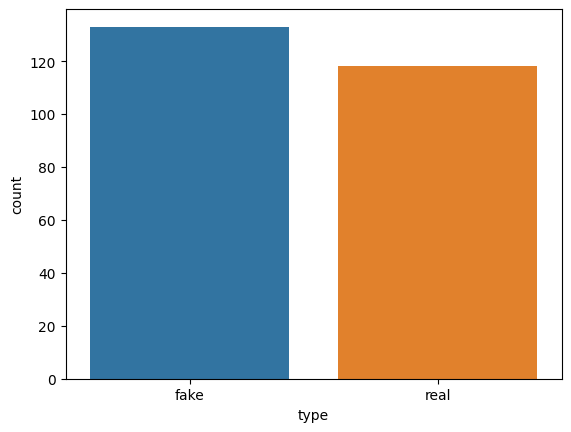

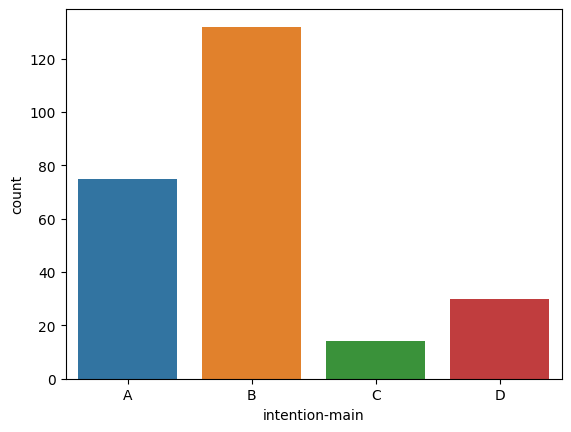

intention-main   A   B   C   D
type                          
fake            44  57  10  22
real            31  75   4   8
intention-main         A         B         C         D
type                                                  
fake            0.330827  0.428571  0.075188  0.165414
real            0.262712  0.635593  0.033898  0.067797


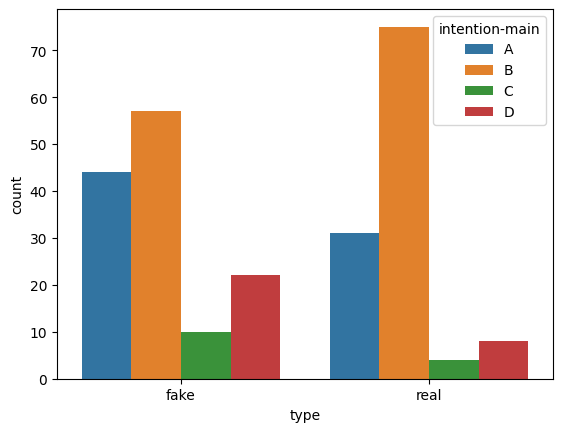

intention-main   A   B   C   D
type                          
fake            44  57  10  22
real            31  75   4   8
Chi-squared value: 12.96252033065274, p-value: 0.004718362401451355


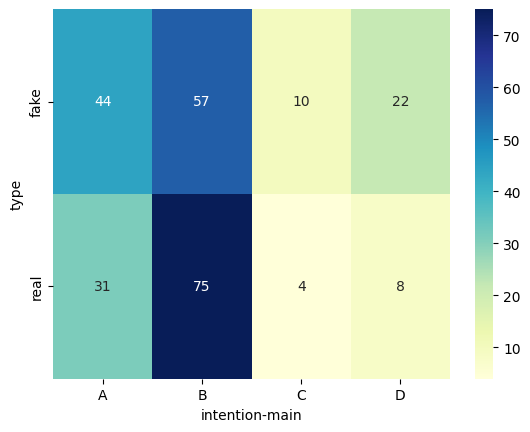

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load your DataFrame (replace 'data.csv' with your actual file path)

# Basic Summary Statistics
print(df_agg.describe())

# Data Distribution (Categorical Features)
sns.countplot(x='type', data=df_agg)
plt.show()
sns.countplot(x='intention-main', data=df_agg)  # Use 'intention-main' here
plt.show()

# Cross-Tabulations
cross_tab = pd.crosstab(df_agg['type'], df_agg['intention-main'])  # Use 'intention-main' here
print(cross_tab)

# Proportions and Percentages
type_intention_proportions = df_agg.groupby(['type', 'intention-main']).size().unstack().apply(lambda x: x / x.sum(), axis=1)  # Use 'intention-main' here
print(type_intention_proportions)

# Comparative Analysis (Bar Plots)
sns.countplot(x='type', hue='intention-main', data=df_agg)  # Use 'intention-main' here
plt.show()

# Descriptive Tables
descriptive_table = pd.pivot_table(df_agg, index='type', columns='intention-main', aggfunc='size', fill_value=0)  # Use 'intention-main' here
print(descriptive_table)

# Statistical Tests (Chi-Squared Test)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-squared value: {chi2}, p-value: {p}")

# Heatmap
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.show()


# 2-Embedding creation and Clustering

In [ ]:

# Preprocess text and tokenize using BERT tokenizer
def preprocess_text(text):
    # Apply any necessary text preprocessing steps here
    preprocessed_text = str(text).lower()  # Convert to lowercase, remove punctuation, etc.
    return preprocessed_text

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def clustering (df):

    # Preprocess and tokenize news articles
    tokenized_articles = [tokenizer.encode(preprocess_text(article), add_special_tokens=True) for article in df['all_text']]

    # Pad and truncate tokenized sequences to a fixed length
    max_length = 500
    padded_articles = [tokens[:max_length] + [0] * (max_length - len(tokens)) for tokens in tokenized_articles]

    # Convert tokenized sequences to tensors
    input_ids = torch.tensor(padded_articles)

    # Generate BERT embeddings
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs[0][:, 0, :].numpy()  # Extract the [CLS] token embeddings

    # Perform dimensionality reduction using UMAP
    reducer = umap.UMAP(n_components=10)
    reduced_embeddings = reducer.fit_transform(embeddings)

    # Perform clustering using HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=20)
    cluster_labels = clusterer.fit_predict(reduced_embeddings)

    # Create DataFrame with news articles, cluster labels, and embeddings
    #df = pd.DataFrame({'Article': news_articles, 'Cluster': cluster_labels, 'Embedding': embeddings.tolist()})
    df['cluster_type']=cluster_labels
    df['embeddings']=embeddings.tolist()





In [ ]:
clustering(df_agg)

In [ ]:
df_agg['all_text'] = df_agg['all_text'].astype(str)
print('clustering agg',df_agg['cluster_type'].value_counts())

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with the provided data
data = {
    "Cluster": [0, 1],
    "Fake": [84, 49],
    "Real": [30, 88],
    "A": [42, 33],
    "B": [51, 84],
    "C": [8, 3],
    "D": [13, 17]
}

df = pd.DataFrame(data)

# Set the index to "Cluster"
df.set_index("Cluster", inplace=True)

# Perform the chi-square test for Cluster and Type
chi2_cluster_type, p_cluster_type, dof_cluster_type, expected_cluster_type = chi2_contingency(df[["Fake", "Real"]])

# Perform the chi-square test for Cluster and Intention
chi2_cluster_intention, p_cluster_intention, dof_cluster_intention, expected_cluster_intention = chi2_contingency(df[["A", "B", "C", "D"]])

# Print the results for Cluster and Type
print("Chi-Square for Cluster vs Type:", chi2_cluster_type)
print("p-value for Cluster vs Type:", p_cluster_type)
print("Degrees of Freedom for Cluster vs Type:", dof_cluster_type)
print("Expected Frequencies for Cluster vs Type:")
print(expected_cluster_type)
print("\n")

# Print the results for Cluster and Intention
print("Chi-Square for Cluster vs Intention:", chi2_cluster_intention)
print("p-value for Cluster vs Intention:", p_cluster_intention)
print("Degrees of Freedom for Cluster vs Intention:", dof_cluster_intention)
print("Expected Frequencies for Cluster vs Intention:")
print(expected_cluster_intention)



Chi-Square for Cluster vs Type: 34.40696257869747
p-value for Cluster vs Type: 4.471209309767266e-09
Degrees of Freedom for Cluster vs Type: 1
Expected Frequencies for Cluster vs Type:
[[60.4063745 53.5936255]
 [72.5936255 64.4063745]]


Chi-Square for Cluster vs Intention: 9.928524313437872
p-value for Cluster vs Intention: 0.019183578899511257
Degrees of Freedom for Cluster vs Intention: 3
Expected Frequencies for Cluster vs Intention:
[[34.06374502 61.31474104  4.99601594 13.62549801]
 [40.93625498 73.68525896  6.00398406 16.37450199]]


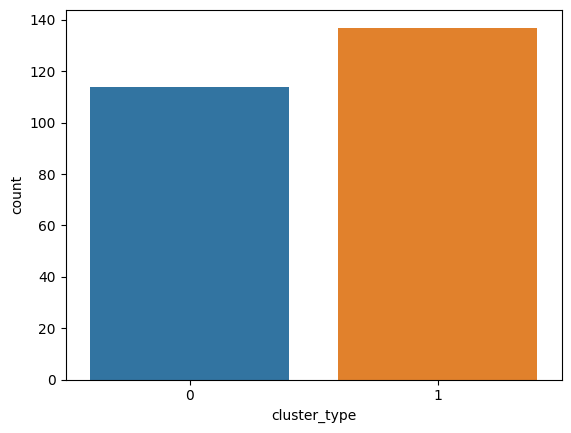

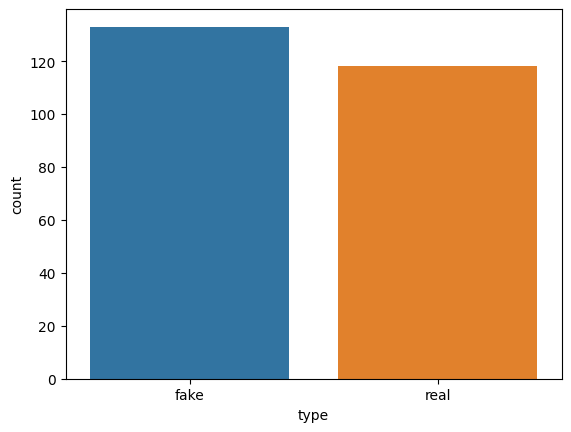

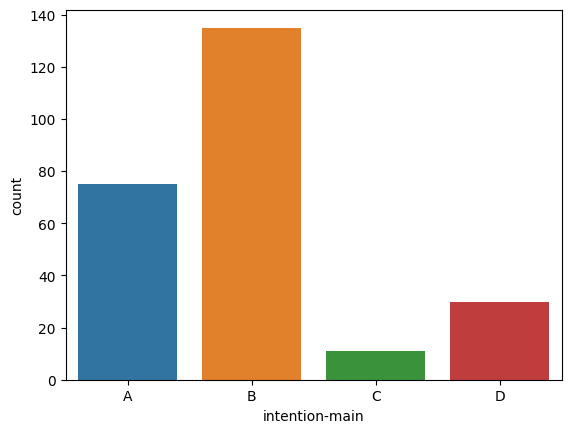

type          fake  real
cluster_type            
0               84    30
1               49    88
intention-main   A   B  C   D
cluster_type                 
0               42  51  8  13
1               33  84  3  17
intention-main   A   B  C   D
type                         
fake            44  59  8  22
real            31  76  3   8
intention-main            A         B         C         D
cluster_type type                                        
0            fake  0.416667  0.392857  0.059524  0.130952
             real  0.233333  0.600000  0.100000  0.066667
1            fake  0.183673  0.530612  0.061224  0.224490
             real  0.272727  0.659091       NaN  0.068182


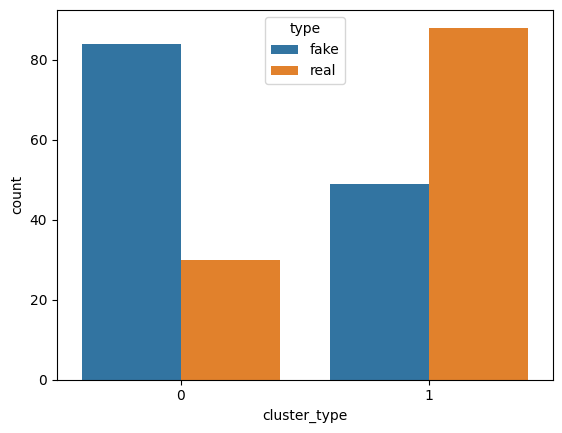

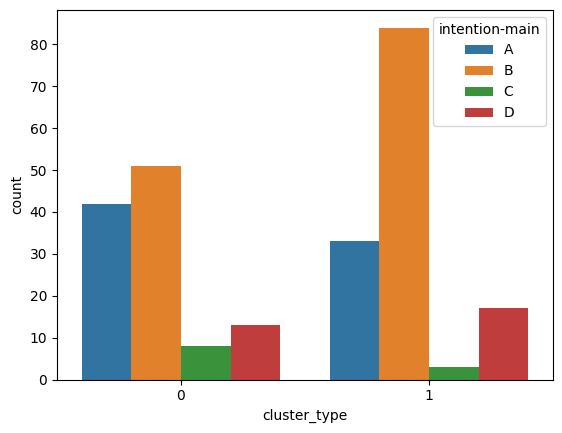

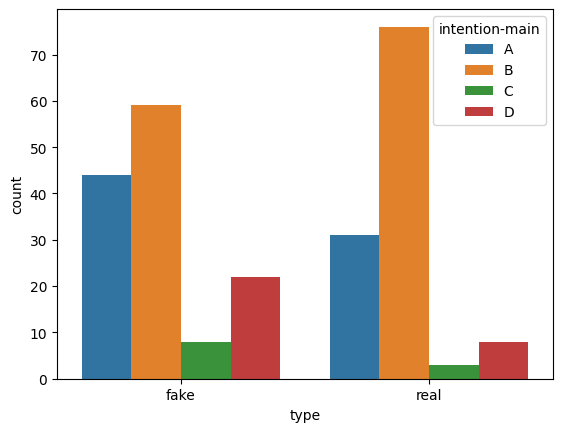

Chi-squared value: 34.40696257869747, p-value: 4.471209309767266e-09


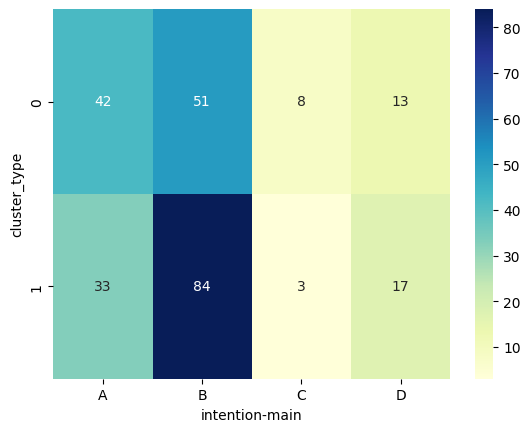

In [ ]:
# Data Distribution (Categorical Features)
sns.countplot(x='cluster_type', data=df_agg)
plt.show()
sns.countplot(x='type', data=df_agg)
plt.show()
sns.countplot(x='intention-main', data=df_agg)
plt.show()

# Cross-Tabulations
cross_tab_cluster_type_type = pd.crosstab(df_agg['cluster_type'], df_agg['type'])
cross_tab_cluster_type_intention = pd.crosstab(df_agg['cluster_type'], df_agg['intention-main'])
cross_tab_type_intention = pd.crosstab(df_agg['type'], df_agg['intention-main'])
print(cross_tab_cluster_type_type)
print(cross_tab_cluster_type_intention)
print(cross_tab_type_intention)

# Proportions and Percentages
type_intention_proportions = df_agg.groupby(['cluster_type', 'type', 'intention-main']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
print(type_intention_proportions)

# Comparative Analysis (Bar Plots)
sns.countplot(x='cluster_type', hue='type', data=df_agg)
plt.show()
sns.countplot(x='cluster_type', hue='intention-main', data=df_agg)
plt.show()
sns.countplot(x='type', hue='intention-main', data=df_agg)
plt.show()

# Chi-Squared Test (example for cluster type vs. type)
chi2, p, dof, expected = chi2_contingency(cross_tab_cluster_type_type)
print(f"Chi-squared value: {chi2}, p-value: {p}")

# Heatmap (example for cross-tabulations)
sns.heatmap(cross_tab_cluster_type_intention, annot=True, cmap='YlGnBu')
plt.show()


# 3-Topic Modeling

In [ ]:

docs_per_topic_agg = df_agg.groupby(['cluster_type'], as_index = False).agg({'all_text': ' '.join})

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count


In [ ]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.cluster_type)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['cluster_type'])
                     .all_text
                     .count()
                     .reset_index()
                     .rename({"Topic": "cluster", "all_text": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

In [ ]:

tf_idf_agg, count_agg = c_tf_idf(docs_per_topic_agg.all_text.values, m=len(df_agg))
top_n_words_agg = extract_top_n_words_per_topic(tf_idf_agg, count_agg, docs_per_topic_agg, n=20)
topic_sizes_agg = extract_topic_sizes(df_agg); topic_sizes_agg.head(10)

,cluster_type,Size
1,1,137
0,0,114


In [ ]:
list(top_n_words_agg.keys())[0]


0

In [ ]:
docs_per_topic_agg

,cluster_type,all_text
0,0,Oscar Pistorius Attempts To Commit Suicide The...
1,1,ICE Detainer Issued for Suspected Wine Country...


In [ ]:
data_frames = [docs_per_topic_agg]
top_n_word_keys = [top_n_words_agg]
tipo = ['agg']

for i, clase in enumerate(data_frames):
    print(tipo[i])
    for j in range(len(top_n_word_keys[i])):
        print('cluster',data_frames[i]['cluster_type'][j])
        print(top_n_word_keys[i][j])


agg
cluster 0
[('fox', 0.003608191200513909), ('votes', 0.00350729090850592), ('malia', 0.003504056108563167), ('cq', 0.0028874268333855917), ('meat', 0.0028184093127841398), ('horse', 0.002750021190547568), ('bullock', 0.0026811820595723347), ('hospital', 0.0026095760484441204), ('pelosi', 0.0025819360799939125), ('joke', 0.0025384810989669856), ('satirical', 0.0025384810989669856), ('hurricane', 0.0025159690340662787), ('photo', 0.0025074651563633636), ('website', 0.002493383080767353), ('seriously', 0.0024352802287122936), ('vegas', 0.0023028709154253217), ('las', 0.0023028709154253217), ('breaking', 0.002264969465793471), ('resign', 0.0022144644600446814), ('detainees', 0.002172594704782982)]
cluster 1
[('benefits', 0.0009764120405919782), ('amendment', 0.000971996650625117), ('medicare', 0.0009708933482503967), ('2005', 0.000955146914170418), ('increase', 0.000954066621014738), ('reform', 0.0009530801602260651), ('term', 0.000949893258941262), ('workers', 0.000948240329259844), ('

In [ ]:
df_agg.to_excel('/content/drive/My Drive/UNED/Tesis/agg_final.xlsx', index=False)